In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
import SimpleITK as sitk  
#from radiomics.featureextractor import *
from sklearn import mixture
from skimage.feature import peak_local_max
from skimage import segmentation

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
#from library_dicom.post_processing.GaussianModel import GaussianModel
from library_dicom.post_processing.WatershedModel import WatershedModel 
from library_dicom.post_processing.WatershedModel_v2 import WatershedModel_v2

In [3]:
#INFERENCE
from library_dicom.post_processing.Mask3D import Mask3D

In [3]:
mask = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.124.113532.172.16.25.2.20120716.81922.1126423_mask_pred_float.nii'

In [4]:
mask_3d_objet = Mask3D(mask)

In [5]:
binary_mask = mask_3d_objet.get_binary_threshold_mask(0.5)

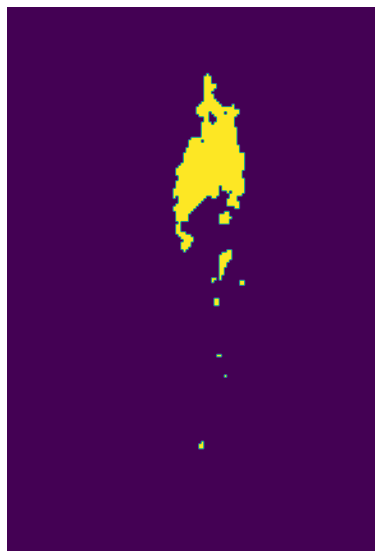

In [7]:
mip_imshow(binary_mask, 0, cmap='viridis', type = 'mask')

In [2]:
#mask_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
#pet_path = r'C:\Users\wendy\Documents\STAGE\gained\1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

mask_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_mask.nii'
pet_path = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/GAINED_NIFTI/11011101061005/pet0/1.2.250.1.74.20130607110000.4000014017745_nifti_PT.nii'

In [ ]:
#WATERSHED MODEL

In [3]:
model = WatershedModel(mask_path, pet_path, type = '4d')

In [4]:
binary_array = model.get_binary_threshold_mask_array(0.41)
binary_img = model.get_binary_threshold_mask_img(0.41)

labelled_img = model.get_labelled_threshold_mask_img(binary_img)
labelled_array = model.get_labelled_threshold_mask_array(labelled_img)

model.label_stat_results(labelled_img)

In [5]:
ws_array, label= model.watershed_model(0.41)

In [6]:
label

62

In [7]:
model.rois_details(ws_array, 62)

{1: 270.8148037776849,
 2: 5.523785964594455,
 3: 9.15654610347189,
 4: 1.6422066381226759,
 5: 209.256936766844,
 6: 237.92090717771254,
 7: 21.995616183340083,
 8: 37.37264197667059,
 9: 8.758435403320938,
 10: 3.9811070015095176,
 11: 0.9952767503773794,
 12: 0.09952767503773793,
 13: 0.34834686263208275,
 14: 0.04976383751886897,
 15: 573.3291720548893,
 16: 700.2767215655241,
 17: 2.5379557134623174,
 18: 20.950575595443834,
 19: 391.8902204610931,
 20: 336.4035416275542,
 21: 500.6739692773407,
 22: 71.46087067709584,
 23: 0.19905535007547587,
 24: 0.9455129128585104,
 25: 0.04976383751886897,
 26: 0.04976383751886897,
 27: 0.5474022127075586,
 28: 0.6966937252641655,
 29: 0.09952767503773793,
 30: 0.04976383751886897,
 31: 0.09952767503773793,
 32: 15.227734280773904,
 33: 0.04976383751886897,
 34: 1.9905535007547588,
 35: 0.39811070015095174,
 36: 0.04976383751886897,
 37: 0.19905535007547587,
 38: 0.04976383751886897,
 39: 0.09952767503773793,
 40: 0.04976383751886897,
 41: 0.

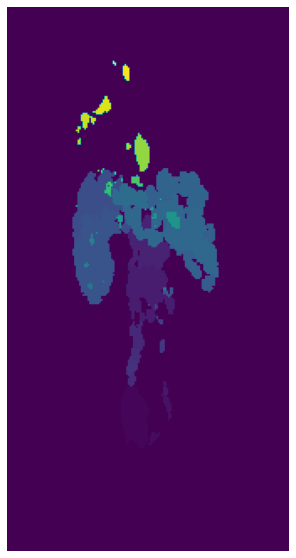

In [7]:
mip_imshow(ws_array, 90, cmap='viridis', type = 'mask')

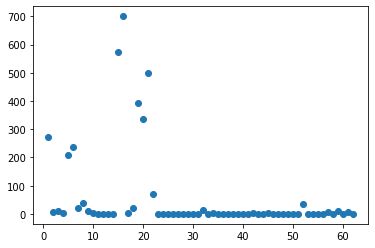

In [12]:
x = np.linspace(1, 62, 62)
x
vol = []
for i in range(1,62+1) : 
    vol.append(dict[i])
vol
plt.scatter(x,vol)

(array([53.,  1.,  1.,  2.,  1.,  1.,  0.,  1.,  1.,  1.]),
 array([4.97638375e-02, 7.00724596e+01, 1.40095155e+02, 2.10117851e+02,
        2.80140547e+02, 3.50163243e+02, 4.20185938e+02, 4.90208634e+02,
        5.60231330e+02, 6.30254026e+02, 7.00276722e+02]),
 <BarContainer object of 10 artists>)

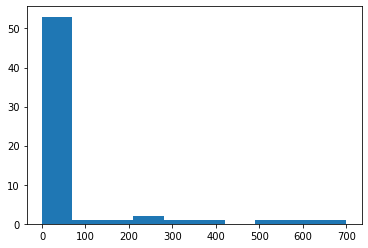

In [13]:
plt.hist(vol)

for i in range(1, 62) :
    new_mask = np.zeros((168,168,324))
    new_mask[np.where(ws_array == i)] = 1
    mip_imshow(new_mask, 0, cmap='viridis', type='mask')

In [6]:
#WATERSHED SUR ENSEMBLE PET 

In [4]:
model_v2 = WatershedModel_v2(mask_path, pet_path, type='4d')

In [5]:
pet_array = model_v2.pet_array
binary_array= model_v2.get_binary_threshold_mask_array(0.41)

In [6]:
labels, num_feat = model_v2.watershed_segmentation(pet_array, binary_array)

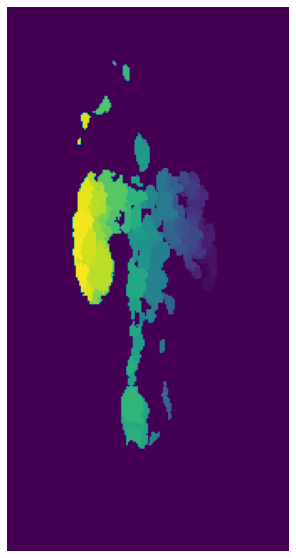

In [7]:
mip_imshow(labels, 90, cmap='viridis', type='mask')

In [8]:
model_v2.rois_details(labels, num_feat)

{1: 12.689778567311587,
 2: 17.46710696912301,
 3: 1.4431512880472,
 4: 20.950575595443834,
 5: 33.09295195004786,
 6: 25.47908480966091,
 7: 37.17358662659512,
 8: 14.083166017839918,
 9: 26.02648702236847,
 10: 73.84953487800155,
 11: 29.410427973651558,
 12: 14.730095905585214,
 13: 8.808199240839807,
 14: 14.132929855358787,
 15: 77.33300350432238,
 16: 12.341431704679504,
 17: 14.03340218032105,
 18: 28.31562354823644,
 19: 13.386472292575752,
 20: 26.325070047481685,
 21: 8.758435403320938,
 22: 33.64035416275542,
 23: 29.659247161245904,
 24: 13.038125429943669,
 25: 9.903003666254925,
 26: 31.79909217455727,
 27: 29.012317273500607,
 28: 62.20479689858621,
 29: 13.237180780019145,
 30: 12.241904029641766,
 31: 22.891365258679723,
 32: 9.903003666254925,
 33: 10.201586691368139,
 34: 59.21896664745407,
 35: 35.48161615095357,
 36: 15.227734280773904,
 37: 3.5829963013585657,
 38: 37.870280351859286,
 39: 14.531040555509739,
 40: 22.692309908604248,
 41: 3.7322878139151725,
 42: 

In [9]:
pet_array = model.pet_array

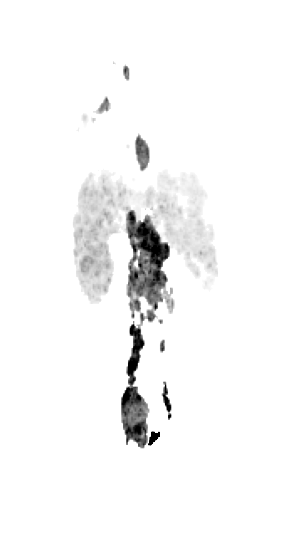

In [10]:
new_mask = np.zeros(model.size_matrix)
new_mask[np.where(binary_array == 1)] = pet_array[np.where(binary_array == 1)]

#show in grayscale 
new = np.transpose(np.flip(new_mask, axis = 2), (2,1,0)) #coronal
vol_angle = scipy.ndimage.interpolation.rotate(new, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 25)

In [11]:
#find local peak 

D = ndimage.distance_transform_edt(new_mask)

localMax = peak_local_max(D, indices = True, min_distance=5)
localMax2 = peak_local_max(D, indices = False, min_distance= 5)

print(len(localMax))

structure = np.ones((3,3,3))

structure
#markers, num_features = ndimage.label(localMax2, structure=np.ones((3,3,3)) )

319


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [12]:
#tous les markers connecté par la structure seront les mêmes
markers, num_features = ndimage.label(localMax2, structure=structure)

In [13]:
markers

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [14]:
num_features

127

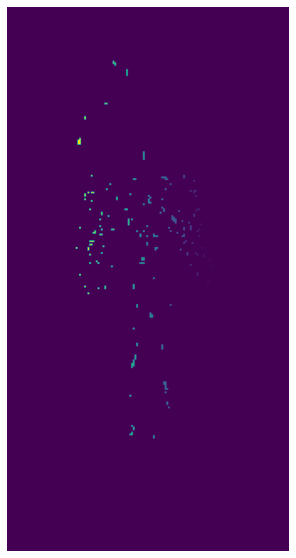

In [15]:
mip_imshow(markers, 90, cmap='viridis', type='mask')

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

In [16]:
labels = segmentation.watershed(-D,markers,mask=new_mask)

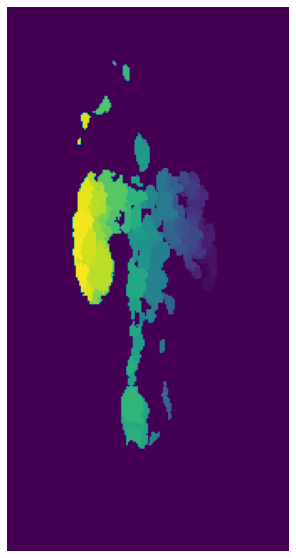

In [17]:
mip_imshow(labels, 90, cmap='viridis', type = 'mask')

In [18]:
volume_voxel = model.pet_spacing[0] * model.pet_spacing[1] * model.pet_spacing[2] * 10**(-3)
vol_tot = 0
vol = []
for i in range(1, num_features + 1):
    x,y,z = np.where(labels == i)
    print('label : {}, volume : {}'.format(i, len(x) * volume_voxel))
    vol_tot += len(x) * volume_voxel
    vol.append(len(x) * volume_voxel)

label : 1, volume : 12.689778567311587
label : 2, volume : 17.46710696912301
label : 3, volume : 1.4431512880472
label : 4, volume : 20.950575595443834
label : 5, volume : 33.09295195004786
label : 6, volume : 25.47908480966091
label : 7, volume : 37.17358662659512
label : 8, volume : 14.083166017839918
label : 9, volume : 26.02648702236847
label : 10, volume : 73.84953487800155
label : 11, volume : 29.410427973651558
label : 12, volume : 14.730095905585214
label : 13, volume : 8.808199240839807
label : 14, volume : 14.132929855358787
label : 15, volume : 77.33300350432238
label : 16, volume : 12.341431704679504
label : 17, volume : 14.03340218032105
label : 18, volume : 28.31562354823644
label : 19, volume : 13.386472292575752
label : 20, volume : 26.325070047481685
label : 21, volume : 8.758435403320938
label : 22, volume : 33.64035416275542
label : 23, volume : 29.659247161245904
label : 24, volume : 13.038125429943669
label : 25, volume : 9.903003666254925
label : 26, volume : 31.7

In [19]:
vol_tot

3480.2837407196207

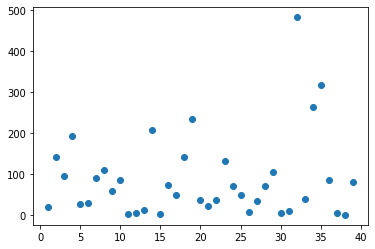

In [26]:
x = np.linspace(1, num_features, num_features)
plt.scatter(x, vol)

(array([18., 10.,  5.,  0.,  3.,  1.,  1.,  0.,  0.,  1.]),
 array([  0.59716605,  48.85315929,  97.10915253, 145.36514578,
        193.62113902, 241.87713226, 290.1331255 , 338.38911874,
        386.64511199, 434.90110523, 483.15709847]),
 <BarContainer object of 10 artists>)

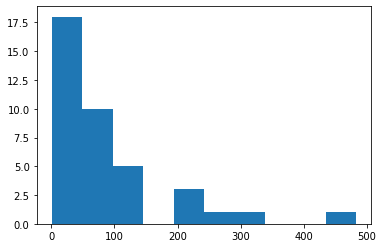

In [27]:
plt.hist(vol)

In [ ]:
#with no structure for markers = 6 connectivity

In [28]:
D = ndimage.distance_transform_edt(new_mask)

localMax = peak_local_max(D, indices = True, min_distance=10)
localMax2 = peak_local_max(D, indices = False, min_distance=10)

#print(len(localMax))
markers, num_features = ndimage.label(localMax2)
print(num_features)
labels = segmentation.watershed(-D,markers,mask=new_mask)

46


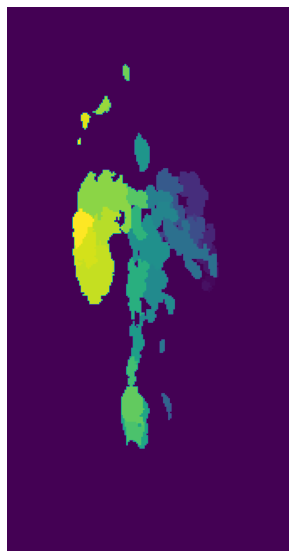

In [29]:
mip_imshow(labels, 90, cmap='viridis', type='mask')

In [30]:
volume_voxel = model.pet_spacing[0] * model.pet_spacing[1] * model.pet_spacing[2] * 10**(-3)
vol_tot = 0
for i in range(1, num_features + 1):
    x,y,z = np.where(labels == i)
    print('label : {}, volume : {}'.format(i, len(x) * volume_voxel))
    vol_tot += len(x) * volume_voxel

label : 1, volume : 14.03340218032105
label : 2, volume : 6.917173415122787
label : 3, volume : 128.68928382379514
label : 4, volume : 13.137653104981407
label : 5, volume : 96.39255327404919
label : 6, volume : 194.17849399862672
label : 7, volume : 26.325070047481685
label : 8, volume : 24.434044221764662
label : 9, volume : 5.374494452037848
label : 10, volume : 89.624671371483
label : 11, volume : 111.27194069219101
label : 12, volume : 59.66684118512389
label : 13, volume : 86.43978577027539
label : 14, volume : 3.7322878139151725
label : 15, volume : 5.424258289556717
label : 16, volume : 6.71811806504731
label : 17, volume : 209.00811757924967
label : 18, volume : 3.9811070015095176
label : 19, volume : 5.175439101962373
label : 20, volume : 74.14811790311477
label : 21, volume : 48.569505418416114
label : 22, volume : 141.77717309125768
label : 23, volume : 233.8402725011653
label : 24, volume : 36.52665673884982
label : 25, volume : 21.995616183340083
label : 26, volume : 10.8

In [57]:
vol_tot

3480.2837407196207

for i in range(1, num_features +1):
    new_mask = np.zeros((168,168,324))
    new_mask[np.where(labels == i)] = i 

    mip_imshow(new_mask, 90, cmap='viridis', type='mask')

In [10]:
#test sortie CNN

pet_path_3 = '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.276.0.72307701.3.2.135124_nifti_PT.nii'
mask_path_3 = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.276.0.72307701.3.2.135124_mask_pred_float.nii'

In [12]:
model_3 = WatershedModel_v2(mask_path_3, pet_path_3, type='3d')

pet_array_3 = model_3.pet_array
binary_array_3 = model_3.get_binary_threshold_mask_array(0.5)

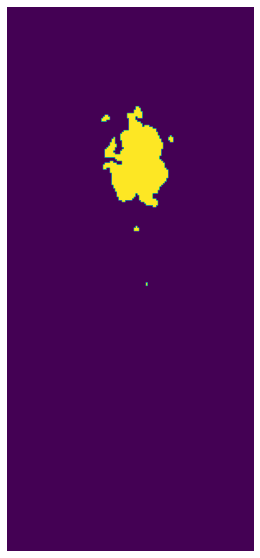

In [24]:
mip_imshow(binary_array_3, 90, cmap='viridis', type='mask')

In [31]:
volume_pixel = model_3.pet_spacing[0] * model_3.pet_spacing[1] * model_3.pet_spacing[2] * 10**(-3)
len(np.where(binary_array_3 == 1)[0]) * volume_pixel

1093.183934841156

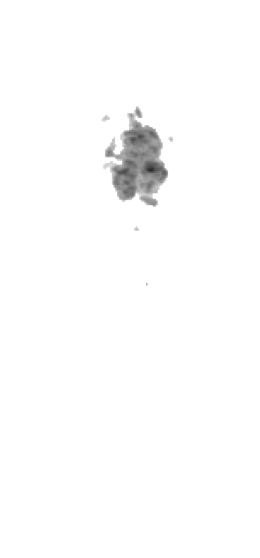

In [26]:
new_mask = np.zeros(model_3.size_matrix)
new_mask[np.where(binary_array_3 == 1)] = pet_array_3[np.where(binary_array_3 == 1)]

#show in grayscale 
new = np.transpose(np.flip(new_mask, axis = 2), (2,1,0)) #coronal
vol_angle = scipy.ndimage.interpolation.rotate(new, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(MIP, cmap='Greys', vmin = 1, vmax = 11)

In [27]:
labels_3, num_feat_3 = model_3.watershed_segmentation(pet_array_3, binary_array_3)

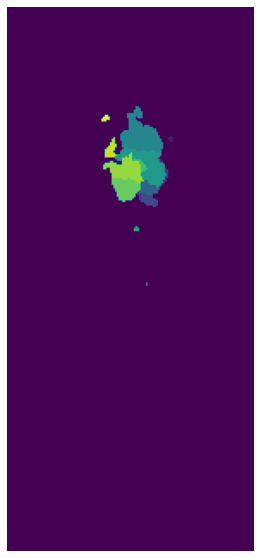

In [28]:
mip_imshow(labels_3, 90, cmap='viridis', type='mask')

In [29]:
num_feat_3

13

In [17]:
model_3.pet_spacing

(4.0, 4.0, 3.999999761581421)

In [18]:
model_3.get_mask_img_spacing()

(4.0, 4.0, 3.999999761581421)

In [16]:
model_3.rois_details(labels_3, num_feat_3)

{1: 1.3439999198913575,
 2: 230.01598628997803,
 3: 14.911999111175538,
 4: 51.07199695587158,
 5: 0.19199998855590822,
 6: 302.52798196792605,
 7: 258.17598461151124,
 8: 0.959999942779541,
 9: 38.911997680664065,
 10: 79.6159952545166,
 11: 88.8959947013855,
 12: 24.383998546600342,
 13: 2.175999870300293,
 'vol_tot': 1093.183934841156}

In [44]:
#AHL autre exemple 

pet_path_4 = '/media/deeplearning/Elements/AHL2011_NIFTI/2.16.56.465769650.3284058294.2637064536_nifti_PT.nii'
mask_path_4 = '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/2.16.56.465769650.3284058294.2637064536_mask_pred_float.nii'

In [47]:
model_4 = WatershedModel_v2(mask_path_4, pet_path_4, type='3d')

pet_array_4 = model_4.pet_array
binary_array_4 = model_4.get_binary_threshold_mask_array(0.5)

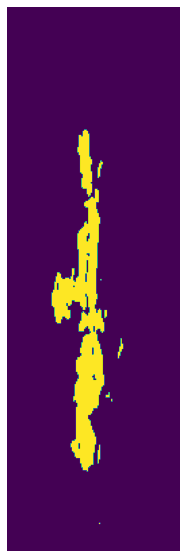

In [48]:
mip_imshow(binary_array_4, 90, cmap='viridis', type='mask')

In [35]:
volume_pixel_4 = model_4.pet_spacing[0] * model_4.pet_spacing[1] * model_4.pet_spacing[2] * 10**(-3)
len(np.where(binary_array_4 == 1)[0]) * volume_pixel_4

1682.9226224455927

In [36]:
model_4.pet_spacing

(5.306727409362793, 5.306727409362793, 2.5)

In [37]:
model_4.get_mask_img_spacing()

(5.306727409362793, 5.306727409362793, 2.5)

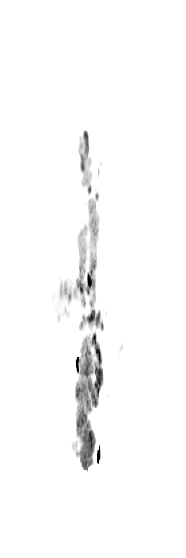

In [40]:
new_mask_4 = np.zeros(model_4.size_matrix)
new_mask_4[np.where(binary_array_4 == 1)] = pet_array_4[np.where(binary_array_4 == 1)]

#show in grayscale 
new_4 = np.transpose(np.flip(new_mask_4, axis = 2), (2,1,0)) #coronal
vol_angle_4 = scipy.ndimage.interpolation.rotate(new_4, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle_4,axis=2)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 20)

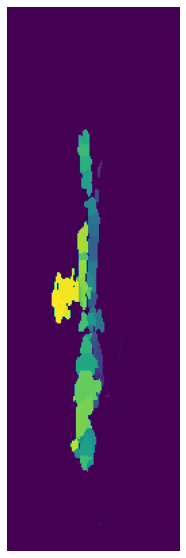

In [41]:
labels_4, num_feat_4 = model_4.watershed_segmentation(pet_array_4, binary_array_4)
mip_imshow(labels_4, 90, cmap='viridis', type='mask')

In [42]:
num_feat_4

55

In [43]:
model_4.rois_details(labels_4, num_feat_4)

{1: 2.88653896922144,
 2: 0.1408067789864117,
 3: 0.7040338949320585,
 4: 0.1408067789864117,
 5: 1.337664400370911,
 6: 0.1408067789864117,
 7: 32.87838289332713,
 8: 2.5345220217554107,
 9: 1.7600847373301463,
 10: 16.403989751916964,
 11: 9.363650802596378,
 12: 5.139447433004027,
 13: 14.573501625093611,
 14: 14.291888067120787,
 15: 12.320593161311024,
 16: 22.03626091137343,
 17: 31.329508324476603,
 18: 23.37392531174434,
 19: 12.109382992831407,
 20: 20.205772784550078,
 21: 16.474393141410168,
 22: 48.437531971325626,
 23: 14.503098235600405,
 24: 19.220125331645196,
 25: 12.179786382324611,
 26: 34.497660851670865,
 27: 11.54615587688576,
 28: 148.62155522015755,
 29: 16.26318297293055,
 30: 0.6336305054388527,
 31: 51.88729805649271,
 32: 40.05952862163413,
 33: 108.3508164300438,
 34: 20.557789732016108,
 35: 31.18870154549019,
 36: 30.132650703092104,
 37: 27.10530495488425,
 38: 24.781993101608457,
 39: 21.050613458468547,
 40: 16.122376193944138,
 41: 40.97477268504581,


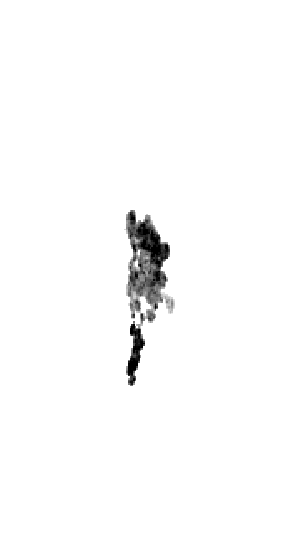

In [73]:
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_array == 5)] = model.pet_array[np.where(labelled_array== 5)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)
new = np.transpose(np.flip(new_mask_3D_5, axis = 2), (2,1,0)) #coronal
vol_angle = scipy.ndimage.interpolation.rotate(new, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)
f = plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_axis_off()
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 25)

#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

In [97]:
D = ndimage.distance_transform_edt(new_mask_3D_5)

localMax = peak_local_max(D, indices = True,  min_distance=20)
localMax2 = peak_local_max(D, indices = False, min_distance=20)
print(len(localMax))
print(localMax2)

21
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False 

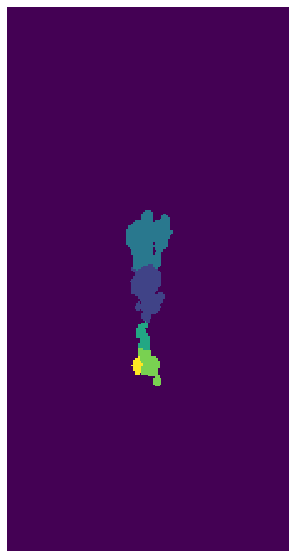

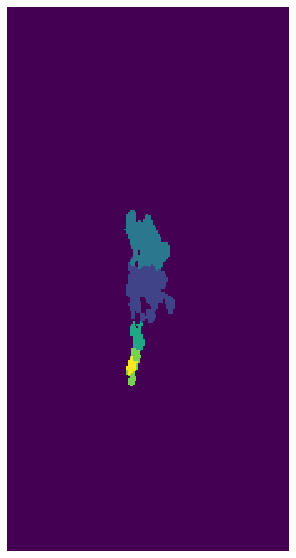

In [98]:
marker_array = ndimage.label(localMax2, structure=np.ones((3,3,3)))[0]
#marker_array = np.zeros((168, 168, 324))
#for marker in range(len(localMax)) : 
    #print(marker)
    #marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_5)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [101]:
np.where(labels ==5)

(array([90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
        92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92, 92,
        93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93,
        93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93,
        93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 93, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94, 94,
        94, 94, 94, 94, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
        95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95,
        95, 95, 95, 95, 96, 96], dtype=int64),
 array([78, 75, 75, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 78, 78, 78, 78,
        78, 79, 79, 79, 79, 80, 75, 75, 75, 75, 75, 76, 76, 76, 76, 76, 76,
        77, 77, 77, 77, 77, 77, 78, 78, 7

In [15]:
volume

7572.264572221183

In [ ]:
#label 11

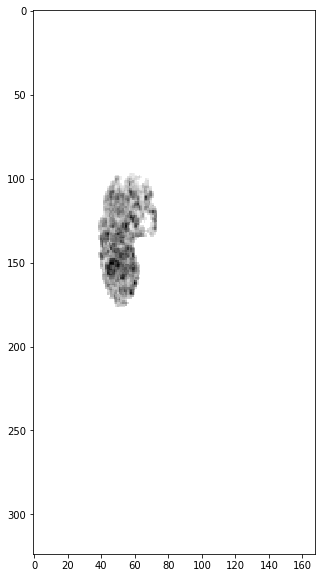

In [105]:
new_mask_3D_11 = np.zeros((168,168,324))
new_mask_3D_11[np.where(labelled_array == 11)] = model.pet_array[np.where(labelled_array== 11)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)

new_11 = np.transpose(np.flip(new_mask_3D_11, axis = 2), (2,1,0)) #coronal

vol_angle = scipy.ndimage.interpolation.rotate(new_11, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)

f = plt.figure(figsize=(10,10))
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 15)
#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

In [103]:
D = ndimage.distance_transform_edt(new_mask_3D_11)

localMax = peak_local_max(D, indices = True,  min_distance=20)
localMax2 = peak_local_max(D, indices = False, min_distance=20)
print(len(localMax))
print(localMax2)

2
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False F

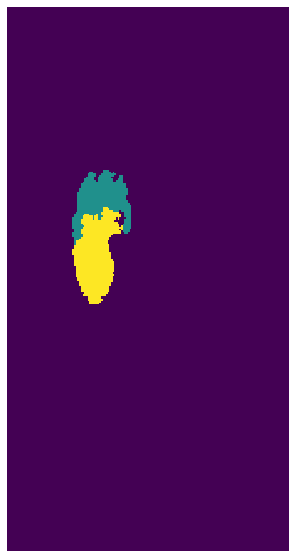

In [106]:
marker_array = ndimage.label(localMax2, structure=np.ones((3,3,3)))[0]
#marker_array = np.zeros((168, 168, 324))
#for marker in range(len(localMax)) : 
    #print(marker)
    #marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_11)
#mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [ ]:
#label 13

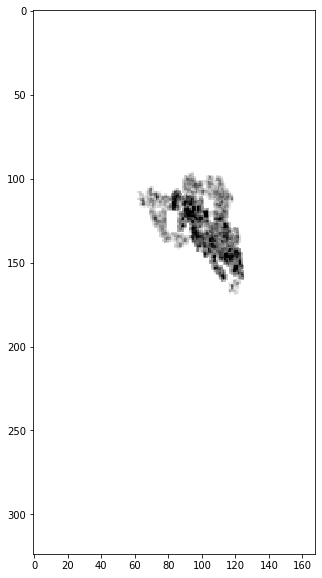

In [142]:
new_mask_3D_13 = np.zeros((168,168,324))
new_mask_3D_13[np.where(labelled_array == 13)] = model.pet_array[np.where(labelled_array== 13)]
#plt.imshow(np.flip(np.amax(new_mask_3D_13, axis = 1), cmap= 'Greys', vmin=4, vmax = 15)

new_13 = np.transpose(np.flip(new_mask_3D_13, axis = 2), (2,1,0)) #coronal

vol_angle = scipy.ndimage.interpolation.rotate(new_13, 90 , reshape=False, axes = (1,2))
MIP = np.amax(vol_angle,axis=2)

f = plt.figure(figsize=(10,10))
plt.imshow(MIP, cmap='Greys', vmin = 4, vmax = 10)
#mip_imshow(new_mask_3D_13, 90, cmap = 'Greys', type = 'mask' )

In [143]:
D = ndimage.distance_transform_edt(new_mask_3D_13)

localMax = peak_local_max(D, indices = True,  min_distance=20)
localMax2 = peak_local_max(D, indices = False, min_distance=20)
print(len(localMax))
print(localMax2)

9
[[[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]]

 ...

 [[False False False ... False False False]
  [False False False ... False False False]
  [False False False ... False False False]
  ...
  [False False False ... False False F

In [146]:
num_features

5

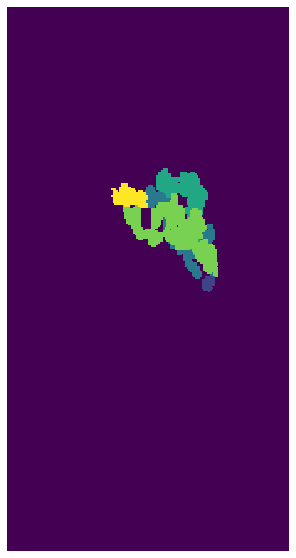

In [145]:
marker_array, num_features = ndimage.label(localMax2, structure=np.ones((3,3,3)))
#marker_array = np.zeros((168, 168, 324))
#for marker in range(len(localMax)) : 
    #print(marker)
    #marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = segmentation.watershed(-D,marker_array,mask=new_mask_3D_13)
#mip_imshow(labels, 0, cmap = 'viridis', type='mask')
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

In [35]:
numero_labels

[1, 5, 11, 13, 43]

In [36]:
labelled_seuil_array = sitk.GetArrayFromImage(labelled_seuil).transpose()

In [83]:
liste = []
for i in range(1,3) :
    liste.append(np.where(labelled_seuil_array == i))

In [85]:
liste[0]

(array([83, 83, 83, ..., 99, 99, 99]),
 array([79, 79, 80, ..., 88, 88, 89]),
 array([82, 83, 83, ..., 90, 91, 90]))

In [87]:
test = np.zeros((168, 168, 324))
test[liste[0]] = 1

In [88]:
np.where(test == 1)

(array([83, 83, 83, ..., 99, 99, 99]),
 array([79, 79, 80, ..., 88, 88, 89]),
 array([82, 83, 83, ..., 90, 91, 90]))

In [196]:
#LABEL 1

In [37]:
new_mask_3D_1 = np.zeros((168,168,324))
new_mask_3D_1[np.where(labelled_seuil_array == 1)] = model.pet_array[np.where(labelled_seuil_array == 1)]

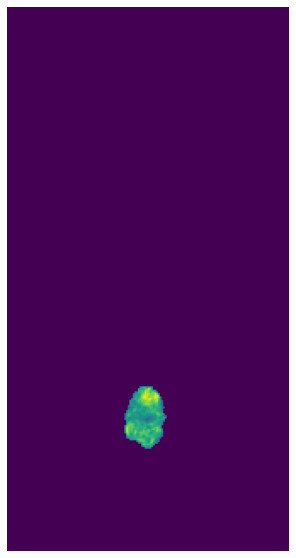

In [38]:
mip_imshow(new_mask_3D_1, 0, cmap = 'viridis', type = 'mask' )

In [39]:
D = ndimage.distance_transform_edt(new_mask_3D_1)
D.shape

(168, 168, 324)

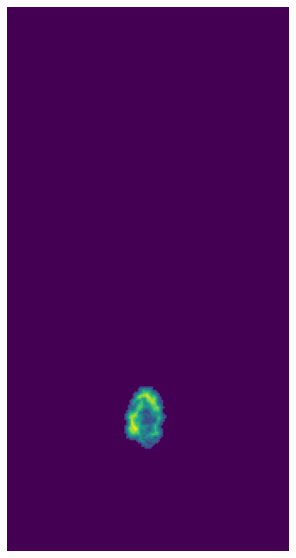

In [40]:
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

In [41]:
from skimage.feature import peak_local_max
localMax = peak_local_max(D, indices = True, min_distance=15)
localMax2 = peak_local_max(D, indices = False, min_distance=15)

In [42]:
localMax

array([[92, 76, 72],
       [94, 83, 92]])

In [43]:
marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1


0
1


In [45]:
import skimage as sk

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_1)

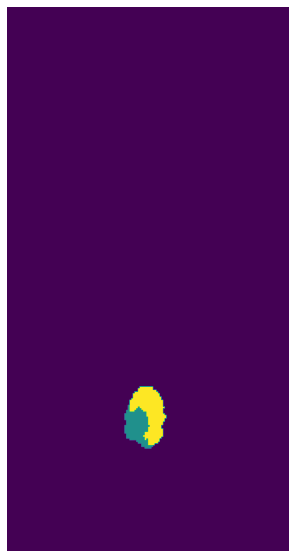

In [46]:
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

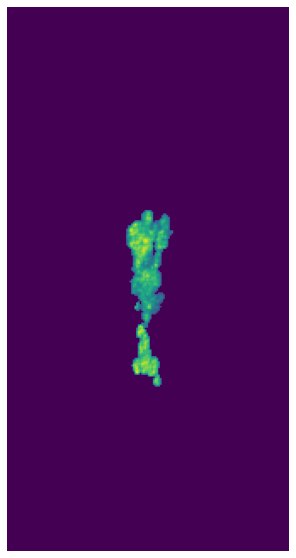

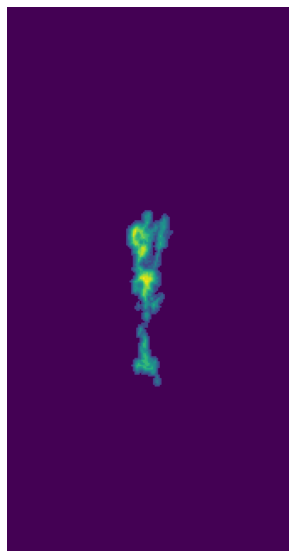

3


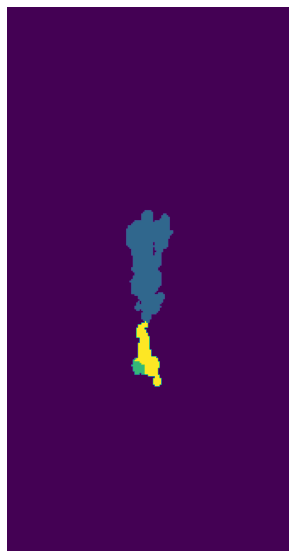

In [51]:
#LABEL 5 
new_mask_3D_5 = np.zeros((168,168,324))
new_mask_3D_5[np.where(labelled_seuil_array == 5)] = model.pet_array[np.where(labelled_seuil_array == 5)]
mip_imshow(new_mask_3D_5, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_5)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_5)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

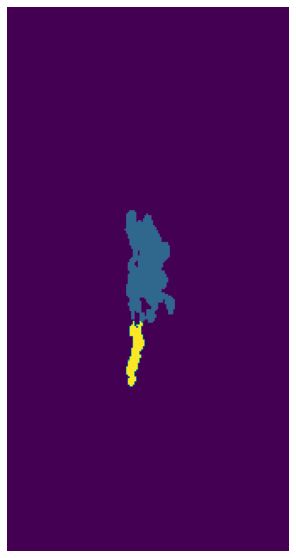

In [52]:
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

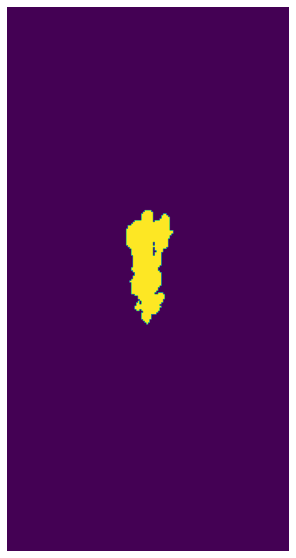

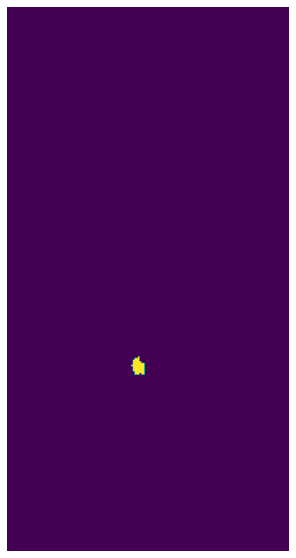

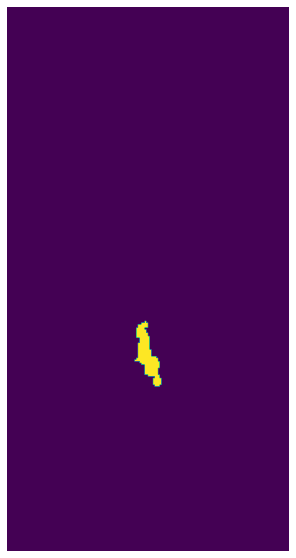

In [54]:
for label in range(1,4):
    new_mask = np.zeros((168, 168, 324))
    new_mask[np.where(labels == label)] = label 

    mip_imshow(new_mask, 0, cmap = 'viridis', type = 'mask')

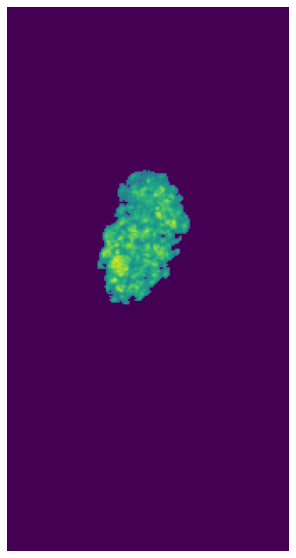

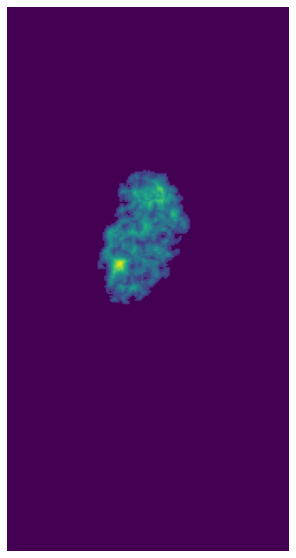

2


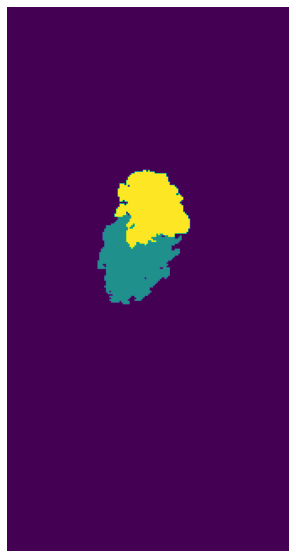

In [57]:
#label 11

new_mask_3D_11 = np.zeros((168,168,324))
new_mask_3D_11[np.where(labelled_seuil_array == 11)] = model.pet_array[np.where(labelled_seuil_array == 11)]
mip_imshow(new_mask_3D_11, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_11)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_11)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

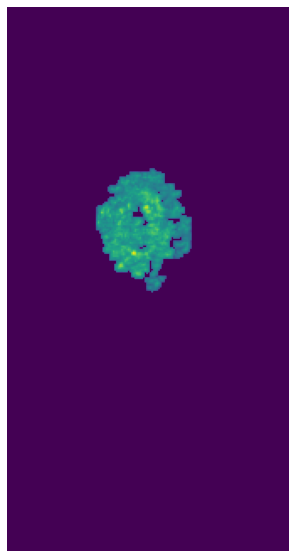

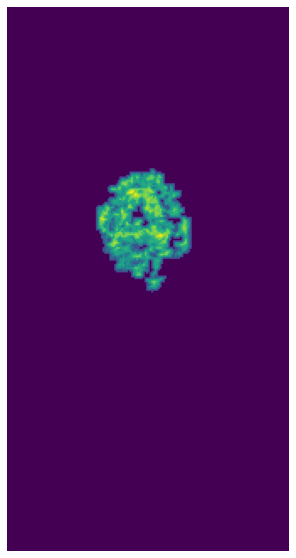

6


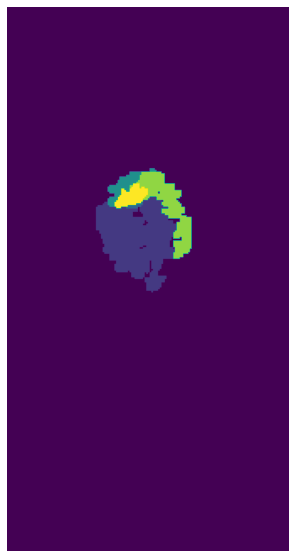

In [58]:
#label 13


new_mask_3D_13 = np.zeros((168,168,324))
new_mask_3D_13[np.where(labelled_seuil_array == 13)] = model.pet_array[np.where(labelled_seuil_array == 13)]
mip_imshow(new_mask_3D_13, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_13)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_13)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')

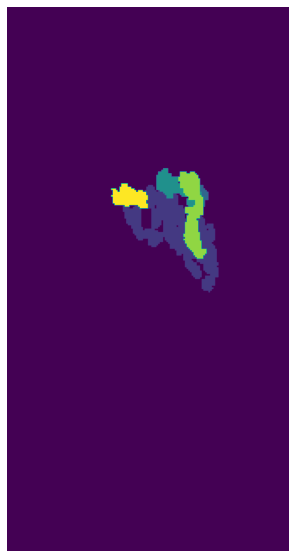

In [62]:
mip_imshow(labels, 90, cmap = 'viridis', type='mask')

for label in range(1,7):
    new_mask = np.zeros((168, 168, 324))
    new_mask[np.where(labels == label)] = label 

    mip_imshow(new_mask, 0, cmap = 'viridis', type = 'mask')

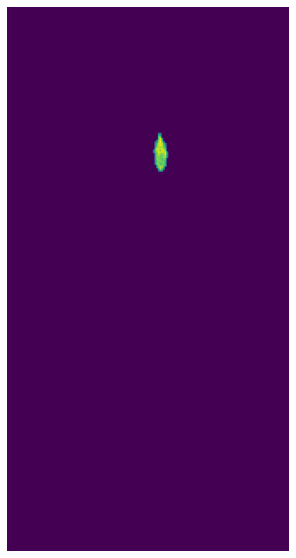

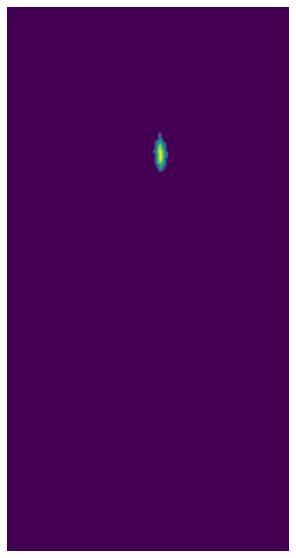

5


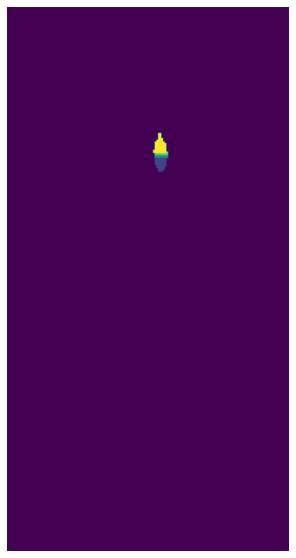

In [76]:
#LABEL 43

new_mask_3D_43 = np.zeros((168,168,324))
new_mask_3D_43[np.where(labelled_seuil_array == 43)] = model.pet_array[np.where(labelled_seuil_array == 43)]
mip_imshow(new_mask_3D_43, 0, cmap = 'viridis', type = 'mask' )
D = ndimage.distance_transform_edt(new_mask_3D_43)
mip_imshow(D, 0, cmap = 'viridis', type = 'mask')

localMax = peak_local_max(D, indices = True, min_distance=41)
localMax2 = peak_local_max(D, indices = False, min_distance=41)

print(len(localMax))

marker_array = np.zeros((168, 168, 324))
for marker in range(len(localMax)) : 
    #print(marker)
    marker_array[localMax[marker][0], localMax[marker][1], localMax[marker][2]] = marker + 1

labels = sk.segmentation.watershed(-D,marker_array,mask=new_mask_3D_43)
mip_imshow(labels, 0, cmap = 'viridis', type='mask')